In [1]:
#MongoDB 접속 명령어 실행
from pymongo import MongoClient
#MongoDB에 파일 저장
from gridfs import GridFS
#MongoDB저장된 파일을 다운로드
from gridfs import GridFSBucket

In [2]:
#MongoDB의 python_test에 접속
db = MongoClient().python_test

In [3]:
fs = GridFS(db)

In [4]:
import urllib.request

In [5]:
url = 'https://pds.joins.com/news/component/htmlphoto_mmdata/201904/08/1d956ae6-eb9c-4a04-8f1f-d1a9e719cde5.jpg'

In [6]:
image_type = url.split('.')[-1]

In [7]:
content_type = 'image/{}'.format(image_type)
content_type

'image/jpg'

In [8]:
url.split('/')[-1]

'1d956ae6-eb9c-4a04-8f1f-d1a9e719cde5.jpg'

In [9]:
image = urllib.request.urlopen(url).read()
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x01L\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x00\x05\x06\x07\x08\xff\xc4\x00@\x10\x00\x02\x01\x03\x03\x02\x04\x04\x03\x07\x04\x01\x03\x04\x03\x01\x01\x02\x11\x00\x03!\x04\x121\x05A\x06"Qa\x13q\x81\x912\xa1\xf0\x07\x14#B\xb1\xc1\xd1\x15R\xe1\xf1b\x083r\x16$CS%\x82\x92\xa2\xff\xc4\x

In [10]:
#!pip install image
#!pip install pillow

In [11]:
from IPython.display import display
from PIL import Image
from io import BytesIO

In [12]:
picture = Image.open(BytesIO(image))

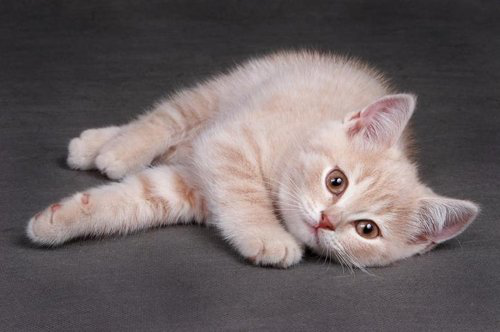

In [13]:
picture

In [14]:
bucket = GridFSBucket(db)

In [15]:
grid_in = bucket.open_upload_stream(
            'test.jpg',
            metadata = {'contentType' : content_type})

In [16]:
grid_in.write(image)

In [17]:
grid_in.close()

In [18]:
MongoClient().close()